### Dependencias

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer


from auxiliares import freq, normalizar
import warnings
warnings.filterwarnings('ignore')
cf.go_offline()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Lectura de datos

In [97]:
df = pd.read_excel('../Datos/encuesta.xlsx')
df.shape

(2098, 36)

### Universo de trabajo 

In [98]:
carreras = ['Actuaría', 'Matemáticas Aplicadas y Computación']

df = df[df['¿A qué carrera ingresaste?'].isin(carreras)].reset_index(drop=True)

# La target es Actuaría, y lo convertimos en 1 (True = 1)
df['target'] = (df['¿A qué carrera ingresaste?']=='Actuaría').astype(int)
df.shape

(506, 37)

* La función freq() nos permite obtener la frecuencia de los valores de una variable. Se tiene que indicar entre parentésis (DataFrame, Variable). FA corresponde a la frecuencia absoluta y FR a la frecuencia relativa, mientras que FAA y FRA corresponden a la frecuencia absoluta acumulada y la frecuencia relativa acumulada respectivamente.

In [99]:
freq(df,'target')

****Tabla de frecuencias  target  ***


    FA        FR  FAA       FRA
0  283  0.559289  283  0.559289
1  223  0.440711  506  1.000000






### Caracterización de las variables

In [100]:
# Hacemos un archivo con las columnas
pd.Series(df.columns).to_clipboard(index=False)

In [101]:
# Agregamos la columna para identificar a los alumnos  
df['id_alumno'] = df.index+1

In [102]:
# Lista de variables continuas
varc = ['¿Cuántos años tienes? 🎂', '¿Qué tanto evitaste que tu carrera tuviera matemáticas?', '¿Qué promedio obtuviste en el bachillerato?', 'Si tuvieras que volver a clases presenciales ¿Cuánto tiempo tardarías en minutos en llegar a la FES Acatlán? ⏱', '¿Cuánto gastarías de pasaje / gasolina a la semana?', '¿A cuánto asciende el ingreso mensual neto de todas las personas que trabajan y viven contigo?', '¿Cuántas personas viven contigo?', '¿Cuántas computadoras hay en tu casa?', 'Hazle un test a tu Internet (ingresando a speedtest.net) y compártenos su velocidad']

# Lista de variables discretas
vard = ['Selecciona tu sexo 👤', '¿Cuál es tu situación sentimental? ❤️', '¿Trabajas? 💼', '¿Tienes hijos? 🍼', 'Esta carrera ¿Fue tu primera opción?', '¿La FES Acatlán fue tu primera opción para cursar esta carrera?', '¿De qué bachillerato provienes?', '¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?']

vart = ['target']

um = ['id_alumno']

In [103]:
# Creamos el dataframe con las variables que nos interesan (anteriormente clasificadas)
df = df[um+vart+varc+vard]

### Análisis exploratorio de datos

#### Discreto

##### Ausentes

In [104]:
# Reemplazamos los ausentes con un 'MISSING'
for v in vard:
    df[v] = df[v].fillna('MISSING').astype(str)

##### Normalización de variables discretas

In [105]:
freq(df,vard)

****Tabla de frecuencias  Selecciona tu sexo 👤  ***


         FA       FR  FAA      FRA
Hombre  358  0.70751  358  0.70751
Mujer   148  0.29249  506  1.00000




****Tabla de frecuencias  ¿Cuál es tu situación sentimental? ❤️  ***


               FA        FR  FAA       FRA
Soltero       386  0.762846  386  0.762846
Tengo pareja  120  0.237154  506  1.000000




****Tabla de frecuencias  ¿Trabajas? 💼  ***


     FA        FR  FAA       FRA
No  368  0.727273  368  0.727273
Si  138  0.272727  506  1.000000




****Tabla de frecuencias  ¿Tienes hijos? 🍼  ***


     FA        FR  FAA       FRA
No  501  0.990119  501  0.990119
Si    5  0.009881  506  1.000000




****Tabla de frecuencias  Esta carrera ¿Fue tu primera opción?  ***


     FA        FR  FAA       FRA
No   94  0.185771   94  0.185771
Si  412  0.814229  506  1.000000




****Tabla de frecuencias  ¿La FES Acatlán fue tu primera opción para cursar esta carrera?  ***


     FA        FR  FAA       FRA
No   81  0.160079   81  0.16

* Cuando normalizamos lo que estamos haciendo es que los valores que tienen pocas respuestas se van a 'otros'

In [106]:
# Normalizamos las variables discretas y las guardamos en una lista
mapa_norm = list (map(lambda v:normalizar(df,v),vard))

In [107]:
mapa_norm

[('Selecciona tu sexo 👤', {'Hombre': 'Hombre', 'Mujer': 'Mujer'}),
 ('¿Cuál es tu situación sentimental? ❤️',
  {'Soltero': 'Soltero', 'Tengo pareja': 'Tengo pareja'}),
 ('¿Trabajas? 💼', {'No': 'No', 'Si': 'Si'}),
 ('¿Tienes hijos? 🍼', {'No': 'No', 'Si': 'No'}),
 ('Esta carrera ¿Fue tu primera opción?', {'Si': 'Si', 'No': 'No'}),
 ('¿La FES Acatlán fue tu primera opción para cursar esta carrera?',
  {'Sí': 'Sí', 'No': 'No'}),
 ('¿De qué bachillerato provienes?',
  {'CCH': 'CCH', 'Otro': 'Otro', 'Prepa UNAM': 'Prepa UNAM'}),
 ('¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?',
  {'Windows': 'Windows', 'MAC OS X': 'Otros', 'Unix / Linux': 'Otros'})]

In [108]:
# Definimos las variables normalizadas en el DataFrame
for v,mapa in mapa_norm:
    df[f'n_{v}'] = df[v].replace(mapa)

In [109]:
varn = [f'n_{v}' for v in vard]

In [110]:
freq(df,varn)

****Tabla de frecuencias  n_Selecciona tu sexo 👤  ***


         FA       FR  FAA      FRA
Hombre  358  0.70751  358  0.70751
Mujer   148  0.29249  506  1.00000




****Tabla de frecuencias  n_¿Cuál es tu situación sentimental? ❤️  ***


               FA        FR  FAA       FRA
Soltero       386  0.762846  386  0.762846
Tengo pareja  120  0.237154  506  1.000000




****Tabla de frecuencias  n_¿Trabajas? 💼  ***


     FA        FR  FAA       FRA
No  368  0.727273  368  0.727273
Si  138  0.272727  506  1.000000




****Tabla de frecuencias  n_¿Tienes hijos? 🍼  ***


     FA   FR  FAA  FRA
No  506  1.0  506  1.0




****Tabla de frecuencias  n_Esta carrera ¿Fue tu primera opción?  ***


     FA        FR  FAA       FRA
No   94  0.185771   94  0.185771
Si  412  0.814229  506  1.000000




****Tabla de frecuencias  n_¿La FES Acatlán fue tu primera opción para cursar esta carrera?  ***


     FA        FR  FAA       FRA
No   81  0.160079   81  0.160079
Sí  425  0.839921  506  1.000000





##### Unarias

* Con Series.nunique() contamos los valores unicos en la Series. 

In [111]:
unarias = [v for v in varn if df[v].nunique()==1]

# Nos quedamos con las variables que no son unarias
varn = [v for v in varn if v not in unarias]
# ELiminamos las var unarias del DataFrame
df.drop(unarias,axis=1,inplace=True)

#### Continuo 

##### Discretización de variables continuas

* La función KBinsDiscretizer() es un método utilizado para codificar el resultado transformado. La opción 'ordinal' devuelve un valor entero. 

In [112]:
# Creamos el objeto
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# Entrenamos con las variables continuas.
kb.fit(df[varc])

KBinsDiscretizer(encode='ordinal')

In [113]:
# Creamos la lista de variables discretizadas
vardisc = [f'disc_{v}' for v in varc]

In [114]:
# Creamos las columnas de variables discretizadas (aplicamos la transformación que definimos arriba)
df[vardisc] = kb.transform(df[varc]).astype(int)

* La función .bin_edges_ lo que hace es partirnos las respuestas en pedacitos

In [115]:
#kb.bin_edges_

In [116]:
# Contamos en cuántos pedacitos partió cada una de las variables.
list(map(len,kb.bin_edges_))

[5, 3, 6, 6, 6, 6, 5, 5, 6]

In [117]:
for v, d in zip(vardisc, map(lambda z: dict(enumerate([f'({t[0]}|{t[1]}]'for t in zip(map(str, z), map(str, z[1:]))])), kb.bin_edges_)):
    df[v] = df[v].replace(d)

In [118]:
freq(df,vardisc)

****Tabla de frecuencias  disc_¿Cuántos años tienes? 🎂  ***


              FA        FR  FAA       FRA
(17.0|18.0]   75  0.148221   75  0.148221
(18.0|19.0]  223  0.440711  298  0.588933
(19.0|20.0]   81  0.160079  379  0.749012
(20.0|30.0]  127  0.250988  506  1.000000




****Tabla de frecuencias  disc_¿Qué tanto evitaste que tu carrera tuviera matemáticas?  ***


            FA        FR  FAA       FRA
(1.0|2.0]  384  0.758893  384  0.758893
(2.0|5.0]  122  0.241107  506  1.000000




****Tabla de frecuencias  disc_¿Qué promedio obtuviste en el bachillerato?  ***


             FA        FR  FAA       FRA
(7.0|7.8]    89  0.175889   89  0.175889
(7.8|8.3]   100  0.197628  189  0.373518
(8.3|8.7]   110  0.217391  299  0.590909
(8.7|9.1]   105  0.207510  404  0.798419
(9.1|10.0]  102  0.201581  506  1.000000




****Tabla de frecuencias  disc_Si tuvieras que volver a clases presenciales ¿Cuánto tiempo tardarías en minutos en llegar a la FES Acatlán? ⏱  ***


                FA       

### Partición 

In [119]:
df = df[um+varn+vardisc+vart]

In [120]:
train,valid = train_test_split(df, test_size=0.3)
train.reset_index(drop=True,inplace=True)
valid.reset_index(drop=True,inplace=True)
train.shape, valid.shape

((354, 18), (152, 18))

### Transformación WoE

* La función pivot_table() permite la agrupación de datos a los que se les aplica alguna función matemática (suma,promedio, etc)

In [121]:
def transformarWoE(v:str)->dict:
    aux = train[[v]+vart].assign(n=1)
    piv = aux.pivot_table(index=v,columns=vart,values='n',aggfunc='sum',fill_value=0)
    piv/=piv.sum()
    piv['woe'] = np.log(piv[0]/piv[1])
    piv = piv[['woe']]
    return v,piv.to_dict()['woe']

In [122]:
# Hacemos la lista con los valores de cada respuesta
mapa_woe = list(map(transformarWoE,varn+vardisc))
mapa_woe

[('n_Selecciona tu sexo 👤',
  {'Hombre': 0.18863635573149687, 'Mujer': -0.4484469306818495}),
 ('n_¿Cuál es tu situación sentimental? ❤️',
  {'Soltero': -0.02109911132417741, 'Tengo pareja': 0.06523176206654775}),
 ('n_¿Trabajas? 💼', {'No': -0.14407793944505387, 'Si': 0.40973617038502497}),
 ('n_Esta carrera ¿Fue tu primera opción?',
  {'No': 2.203032918931966, 'Si': -0.330663895025466}),
 ('n_¿La FES Acatlán fue tu primera opción para cursar esta carrera?',
  {'No': 0.03034945051186459, 'Sí': -0.005686037829988318}),
 ('n_¿De qué bachillerato provienes?',
  {'CCH': -0.7574064015809153,
   'Otro': 1.6434171309965435,
   'Prepa UNAM': -0.3847311162957417}),
 ('n_¿Qué sistema operativo tiene la computadora que utilizas para estudiar en línea?',
  {'Otros': -0.22530337936763983, 'Windows': 0.012976831074359577}),
 ('disc_¿Cuántos años tienes? 🎂',
  {'(17.0|18.0]': -0.9060280399290279,
   '(18.0|19.0]': -0.7810803909958969,
   '(19.0|20.0]': 0.7899273003614189,
   '(20.0|30.0]': 1.79756781

In [123]:
for v,mapa in mapa_woe:
    train[f'woe_{v}'] = train[v].replace(mapa)

In [124]:
varw = [f'woe_{v}' for v in varn+vardisc]

### Calcular el poder predictivo

In [125]:
def calcularIV(v:str)->dict:
    aux = train[[v]+vart].assign(n=1)
    piv = aux.pivot_table(index=v,columns=vart,values='n',aggfunc='sum',fill_value=0)
    piv/=piv.sum()
    piv['woe'] = np.log(piv[0]/piv[1])
    piv['iv'] = (piv[0]-piv[1])*piv['woe']
    return v,piv.sum()['iv']

In [126]:
ivr = pd.DataFrame(map(calcularIV,varn+vardisc),columns=['variable','iv']).sort_values('iv',ascending=False)

In [127]:
best = list(ivr[ivr['iv']>0.1]['variable'])

best = [f'woe_{v}' for v in best]
#best

In [128]:
# Estas son las variables que nos ayudan a predecir la carrera
len(best)

4

### Aprendizaje (Regresión Logística)
$$P = \frac{1}{1+e^{-\theta-\vec{\theta}\cdot x}}$$

In [129]:
# Creamos el modelo
mod = LogisticRegression()

# Entrenamos con nuestras xi(las mejores variables) y la y(target)
mod.fit(train[best],train['target'])

LogisticRegression()

$\vec{\theta}$

In [130]:
mod.coef_

array([[-0.46023706, -1.01186527, -0.67457422, -1.07623398]])

$\theta_0=\alpha$

In [131]:
alpha = mod.intercept_[0]

In [132]:
roc_auc_score(train['target'],mod.predict_proba(train[best])[:,1])

0.8895303070060352

### Validación del Modelo

In [133]:
for v,mapa in mapa_woe:
    valid[f'woe_{v}']= valid[v].replace(mapa)

In [134]:
roc_auc_score(valid['target'],mod.predict_proba(valid[best])[:,1])

0.8869264069264069

### Transformación Scorecard

In [165]:
# Points to double odds´
pdo = 8
# Base points(este valor lo cambiamos para que el valor máximo sea 100 y todos los valores entren en los rangos)
base = 33
# Base odds
base_odds = 1
factor =  pdo/np.log(2)
offset = base - factor*np.log(base_odds)
factor, offset

(11.541560327111707, 33.0)

In [166]:
n = len(best)

In [167]:
for v,beta in zip(best,mod.coef_[0]):
    train[f'p_{v}'] = np.floor((-train[v]*beta+alpha/n)*factor+offset/n).astype(int)

In [168]:
varp = [f'p_{v}' for v in best]

In [169]:
train['score'] = train[varp].sum(axis = 1)

In [170]:
train['score'].describe()

count    354.000000
mean      33.918079
std       24.210750
min        3.000000
25%        9.000000
50%       35.000000
75%       51.750000
max       99.000000
Name: score, dtype: float64

<Axes: >

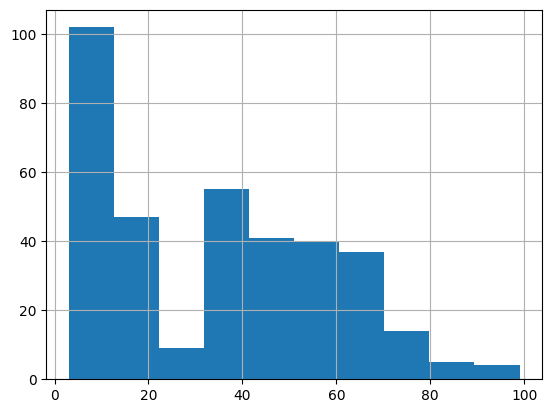

In [171]:
train['score'].hist()

In [172]:
train['r_score'] = pd.cut(train['score'], bins = range(0,120,20), include_lowest=True).astype(str)

In [173]:
freq(train, 'r_score')

****Tabla de frecuencias  r_score  ***


                 FA        FR  FAA       FRA
(-0.001, 20.0]  144  0.406780  144  0.406780
(20.0, 40.0]     69  0.194915  213  0.601695
(40.0, 60.0]     81  0.228814  294  0.830508
(60.0, 80.0]     51  0.144068  345  0.974576
(80.0, 100.0]     9  0.025424  354  1.000000






In [174]:
# Aquí tenemos los valores de acuerdo al scoring para determinar la carrera
piv = train.pivot_table(index='r_score',columns='target',values='id_alumno',aggfunc='count',fill_value=0)
piv['total'] = piv.sum(axis=1)
piv['actuaría'] = piv[1]/piv['total']
piv['mac'] = piv[0]/piv['total']
piv[['actuaría','mac']].iplot(kind='bar',barmode='stack',title='Distribución de la población por score')

In [175]:
scorecard = []
for v in best:
    nombre  = "_".join(v.split('_')[1:])
    aux = train[[nombre,f'p_{v}']].copy().drop_duplicates().sort_values(by=nombre)
    aux.columns = ['atributo','puntaje']
    aux.insert(0,'característica',"_".join(nombre.split('_')[1:]))
    scorecard.append(aux.reset_index(drop=True))
scorecard = pd.concat(scorecard,ignore_index=True)

In [176]:
# Connvertimos en un excel
scorecard.groupby(['característica','atributo']).sum().to_excel('scorecard.xlsx')